In [3]:
import pandas as pd

SDSS_DR16 = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(SDSS_DR16)


In [4]:
import numpy as np

Types = df.loc[0:1e5, 'Types']
types = Types.apply(lambda v: v.replace(
    'elliptical', '0').replace('spiral', '1')).astype(int)

X = np.array(df.loc[0:1e5, 'petroMag_u':'petroMag_z'])
y = np.array(types)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [4]:
'''
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

C = 1000000000
gamma = 0.0001

# RBF Kernel
clf_rbf = Pipeline(
    [("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma))])

clf_fit = clf_rbf.fit(X_train, y_train)
clf_fit
'''

Pipeline(steps=[('rbf_svc', SVC(C=1000000000, gamma=0.0001))])

In [6]:
import pickle
'''
# save train-test data
clf_save = open('clf_fix_0-1e5.csv', 'wb')
pickle.dump(clf_fit, clf_save)
clf_save.close()
'''

"\n# save train-test data\nclf_save = open('clf_fix_0-1e5.csv', 'wb')\npickle.dump(clf_fit, clf_save)\nclf_save.close()\n"

In [7]:
# load data
clf_read = open('clf_fix_0-1e5.csv', 'rb')
clf = pickle.load(clf_read)
clf


Pipeline(steps=[('rbf_svc', SVC(C=1000000000, gamma=0.0001))])

In [7]:
'''
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)

print("Train set accuracy = " + str(train))
print("Test set accuracy = " + str(test))
'''

Train set accuracy = 0.8476133333333333
Test set accuracy = 0.8494860205591777


Train set accuracy = 0.8476133333333333

Test set accuracy = 0.8494860205591777

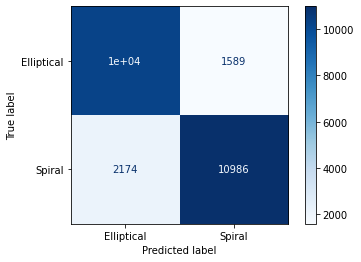

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cmap = 'Blues'
label_name = 'Elliptical', 'Spiral'

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap=cmap, display_labels=label_name)
    
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(10252, 1589, 2174, 10986)

In [11]:
# Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
# True positive rate / Sensitivity / Hit rate / Recall 
tpr = tp/(tp+fn)
# True negative rate / Specificity
tnr = tn/(tn+fp)
# False positive rate / Fall out
fpr = fp/(fp+tn)
# False negative rate
fnr = fn/(fn+tp)
# Positive predictive value / Precision
ppv = tp/(tp+fp)
# Negative predictive value
npv = tn/(tn+fn)
# False discovery rate
fdr = fp/(fp+tp)

print("acc = " + str(acc))
print("tpr = " + str(tpr))
print("tnr = " + str(tnr))
print("fpr = " + str(fpr))
print("fnr = " + str(fnr))
print("ppv = " + str(ppv))
print("npv = " + str(npv))
print("fdr = " + str(fdr))

acc = 0.8494860205591777
tpr = 0.8348024316109423
tnr = 0.8658052529347183
fpr = 0.13419474706528164
fnr = 0.16519756838905775
ppv = 0.8736381709741551
npv = 0.8250442620312248
fdr = 0.12636182902584492


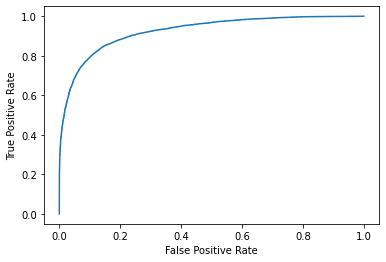

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

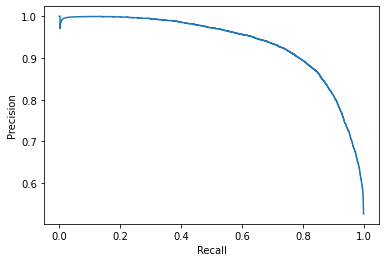

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])

pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()